In [54]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import connect_to_db as cn
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import MaxNLocator

In [37]:
# font 설정.
plt.rcParams.update({'font.family':'Arial'})

In [14]:
def normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [93]:
def draw_multiple_cdf_normalize_y(np_result_list, title, colors, xlabel, legends, linestyles, log_scale, only_integer=False):
    if log_scale:
        title = title + '_log_scale'
    filename = title + '.eps'
    fig = plt.figure(figsize=(15,10))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    
    for np_result, color, legend, linestyle in zip(np_result_list, colors, legends, linestyles):
        sorted_data = np.sort(np_result)
        if legend == 'no legend':
            plt.step(sorted_data, normalization(np.arange(sorted_data.size)), color=color, linestyle=linestyle, linewidth=7)
        else:
            plt.step(sorted_data, normalization(np.arange(sorted_data.size)), label=legend, color=color, linestyle=linestyle, linewidth=7)
        # plt.xlabel(xlabel, fontsize=24)
        # plt.title(title, fontsize=18)
        if log_scale:
            plt.xscale('symlog')
            
        ax.spines['right'].set_color('black')
        ax.spines['top'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')
        
        if only_integer:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            
        # plt.rcParams['axes.facecolor'] = 'white'        
  
    if legend != 'no legend':
        plt.legend(prop={'size': 50 }, loc = 'lower right', framealpha=1, edgecolor='0')

    # plt.xticks(fontsize=40)
    plt.xticks(fontsize=36)
    plt.yticks(fontsize=36)
    
    plt.savefig(f"/home/mykim/source/plotting-and-graph-analysis/eps/{filename}", bbox_inches='tight', format='eps')
    plt.show()

In [83]:
sql = 'select * from mentor;'
result_df = cn.select_query_result_to_df(sql)
result_df

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_score_entropy,es_score_entropy,average_vote
0,_________________UWU,1,1,2.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
1,______________Blank,1,1,2.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
2,_________-----------,1,1,3.00000000,1.00000000,None,None,0E-8,0E-8,1.00000
3,_________ez_________,1,1,1.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
4,_______woohoo,1,1,1.00000000,2.00000000,None,None,0E-8,0E-8,3.00000
...,...,...,...,...,...,...,...,...,...,...
461352,Zzzzz315,1,1,1.00000000,3.00000000,None,None,0E-8,0E-8,1.00000
461353,zzzzzima,2,2,2.00000000,2.00000000,0.16390613,0E-8,0E-8,0.63092975,13.00000
461354,zzzzzsleepyzzzzz,2,2,1.50000000,1.50000000,0.03616722,0.04416443,0.63092975,0.63092975,1.50000
461355,zzzzzzz____,2,2,1.00000000,2.00000000,0.23076793,0E-8,0E-8,0E-8,1.50000


In [16]:
sql2 = 'select * from mentor where comments_similarity >= 0;'
result_df2 = cn.select_query_result_to_df(sql2)
result_df2

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_score_entropy,es_score_entropy,average_vote
0,_______ZERO,10,10,1.10000000,2.20000000,0.09195855,0.05160771,0.29590327,0.81734542,6.60000
1,______V______,6,6,1.33333333,2.66666667,0.10136209,0.04694719,0.57938016,0.57938016,1.16667
2,_____0_,2,2,1.00000000,2.50000000,0.07903821,0.03580134,0E-8,0.63092975,2.50000
3,_____boop,7,7,1.28571429,2.85714286,0.15010499,0.02310080,0.54456845,0.37330396,1.71429
4,_____els3sle-,8,7,1.25000000,1.87500000,0.13326611,0.04322288,0.51185951,0.88685951,2.00000
...,...,...,...,...,...,...,...,...,...,...
224401,ZzzzoZzzzo,3,3,1.66666667,1.33333333,0.12780807,0.13645193,0.57938016,0.57938016,2.33333
224402,zzzztheday,11,11,1.54545455,2.18181818,0.11286962,0.03088349,0.82607422,0.94318878,3.36364
224403,zzzzzima,2,2,2.00000000,2.00000000,0.16390613,0E-8,0E-8,0.63092975,13.00000
224404,zzzzzsleepyzzzzz,2,2,1.50000000,1.50000000,0.03616722,0.04416443,0.63092975,0.63092975,1.50000


In [17]:
sql3 = 'select * from mentor where posts_similarity >= 0;'
result_df3 = cn.select_query_result_to_df(sql3)
result_df3

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_score_entropy,es_score_entropy,average_vote
0,_______ZERO,10,10,1.10000000,2.20000000,0.09195855,0.05160771,0.29590327,0.81734542,6.60000
1,______V______,6,6,1.33333333,2.66666667,0.10136209,0.04694719,0.57938016,0.57938016,1.16667
2,_____0_,2,2,1.00000000,2.50000000,0.07903821,0.03580134,0E-8,0.63092975,2.50000
3,_____boop,7,7,1.28571429,2.85714286,0.15010499,0.02310080,0.54456845,0.37330396,1.71429
4,_____els3sle-,8,7,1.25000000,1.87500000,0.13326611,0.04322288,0.51185951,0.88685951,2.00000
...,...,...,...,...,...,...,...,...,...,...
220836,ZzzzoZzzzo,3,3,1.66666667,1.33333333,0.12780807,0.13645193,0.57938016,0.57938016,2.33333
220837,zzzztheday,11,11,1.54545455,2.18181818,0.11286962,0.03088349,0.82607422,0.94318878,3.36364
220838,zzzzzima,2,2,2.00000000,2.00000000,0.16390613,0E-8,0E-8,0.63092975,13.00000
220839,zzzzzsleepyzzzzz,2,2,1.50000000,1.50000000,0.03616722,0.04416443,0.63092975,0.63092975,1.50000


In [18]:
result_df4 = pd.read_csv('random_similarity_2.csv')
print(result_df4)

     random_comments_similarity  random_posts_similarity
0                      0.000000                 0.000000
1                      0.170055                 0.000000
2                      0.072244                 0.000000
3                      0.033894                 0.078745
4                      0.071075                 0.000000
..                          ...                      ...
995                    0.199084                 0.000000
996                    0.084693                 0.000000
997                    0.079526                 0.000000
998                    0.000000                 0.059930
999                    0.181773                 0.000000

[1000 rows x 2 columns]


In [92]:
random = list(np.array(result_df4['random_posts_similarity'].tolist()))
zero_count = 0
for element in random:
    if element == 0:
        zero_count += 1
print(zero_count)
print(zero_count / len(random))

730
0.73


In [19]:
result_df5 = pd.read_csv('random_similarity_4.csv')
print(result_df5)

     random_comments_similarity  random_posts_similarity
0                      0.096070                 0.021508
1                      0.042308                 0.046670
2                      0.113791                 0.034269
3                      0.090947                 0.023521
4                      0.070478                 0.021279
..                          ...                      ...
995                    0.088427                 0.025323
996                    0.057559                 0.000000
997                    0.066319                 0.000000
998                    0.136684                 0.000000
999                    0.007605                 0.010563

[1000 rows x 2 columns]


In [20]:
sql4 = 'select * from nodes;'
result_df6 = cn.select_query_result_to_df(sql4)
result_df6

,node_id,indegree,outdegree,top_k_indegree,top_k_outdegree,community_id_fastgreedy_is,community_id_fastgreedy_es,community_id_leiden_is,community_id_leiden_es
0,_________________UWU,2,1,100.00,100.00,0,0,0,0
1,______________Blank,0,1,100.00,100.00,0,0,1,1
2,_________-----------,0,1,100.00,100.00,1,1,3,3
3,_________ez_________,0,1,100.00,100.00,2,2,4,5
4,________hey,1,0,100.00,100.00,0,0,412518,287201
...,...,...,...,...,...,...,...,...,...
691421,zzzzzzzzzra,5,0,100.00,100.00,3,3,26665,25782
691422,zzzzzzzzzz-,0,1,100.00,100.00,0,0,552012,485042
691423,ZZZZZzzzzzxzx,1,0,100.00,100.00,0,0,370778,331291
691424,zzzzzzzzzzzsdasd,2,0,100.00,100.00,10667,10667,262068,238435


In [21]:
sql5 = 'select community_id_fastgreedy_is, count(*) from nodes group by community_id_fastgreedy_is;'
result_df7 = cn.select_query_result_to_df(sql5)
result_df7

,community_id_fastgreedy_is,count(*)
0,0,201900
1,1,152391
2,2,117700
3,7636,3
4,3,135933
...,...,...
21365,21206,2
21366,21368,2
21367,21281,2
21368,21255,2


In [97]:
subreddit_df = pd.read_csv('/home/mykim/source/plotting-and-graph-analysis/subreddit/subreddit_analysis.csv')
print(subreddit_df)

       community_id  subreddits  subreddit_entropy     value
0              6285           2           0.591673  0.714286
1             11087           1           0.000000  1.000000
2             15841           1           0.000000  1.000000
3             12018           1           0.000000  1.000000
4              5286           1           0.000000  1.000000
...             ...         ...                ...       ...
21365         10797           1           0.000000  1.000000
21366         18617           1           0.000000  1.000000
21367          5535           1           0.000000  1.000000
21368         20854           1           0.000000  1.000000
21369         14641           1           0.000000  1.000000

[21370 rows x 4 columns]


In [5]:
connection = cn.make_connection('connection.csv')

cursors3 = []
sqls3 = []
results3 = []
result_list3 = []
for i in range(6):
    cursors3.append(connection.cursor(pymysql.cursors.DictCursor))

where = "is_valid=1 and is_valid_author=1 and link_key=parent_key;"

sqls3.append("select score from comments where is_score = 1 and " + where)
sqls3.append("select score from comments where is_score = 2 and " + where)
sqls3.append("select score from comments where is_score = 3 and " + where)
sqls3.append("select score from comments where es_score = 1 and " + where)
sqls3.append("select score from comments where es_score = 2 and " + where)
sqls3.append("select score from comments where es_score = 3 and " + where)

for i in range(6):
    cursors3[i].execute(sqls3[i])
    # result가 dict 형태로 return.
    results3.append(cursors3[i].fetchall())

connection.close()

for i in range(6):
    results3[i] = pd.DataFrame(results3[i])
    result_list3.append(list(np.array(results3[i]['score'].tolist())))

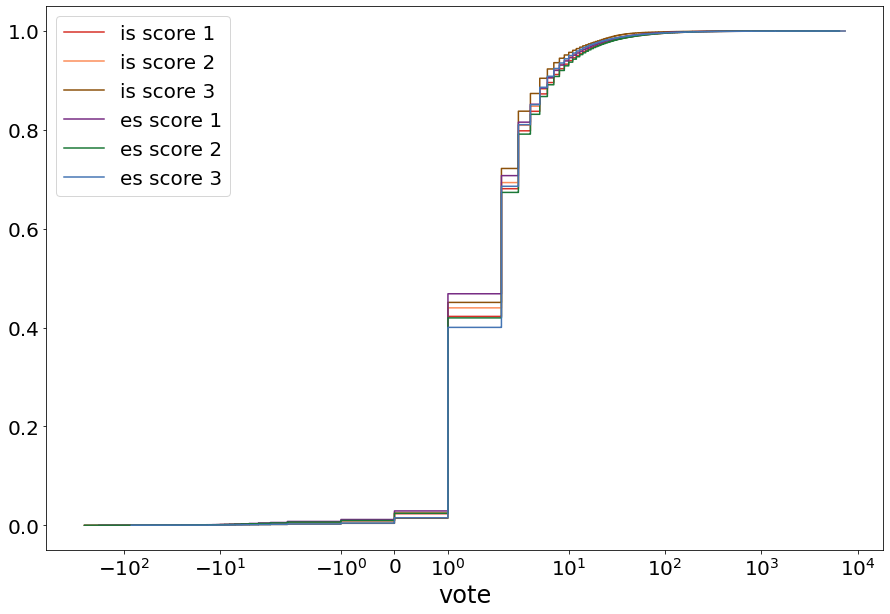

In [11]:
result_list3
colors = ['#d73027', '#fc8d59', '#8c510a', '#762a83', '#1b7837', '#4575b4']
legends = ['is score 1', 'is score 2', 'is score 3', 'es score 1', 'es score 2', 'es score 3']
draw_multiple_cdf_normalize_y(result_list3, "vote", colors, 'vote', legends, True)

# no title (for paper)

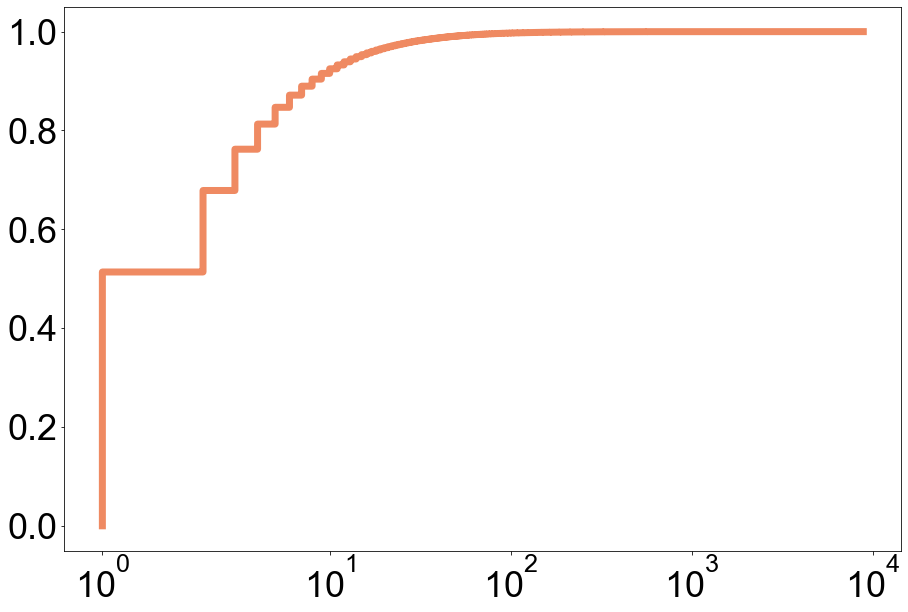

In [63]:
np_result = np.array(result_df['comment_cnt'].tolist())
np_result_list = []
np_result_list.append(np_result)
colors = ['#ef8a62']
legends = ['no legend']
linestyles = ['-']
draw_multiple_cdf_normalize_y(np_result_list, "cdf_users_comments_count", colors, '# Comments', legends, linestyles, True)

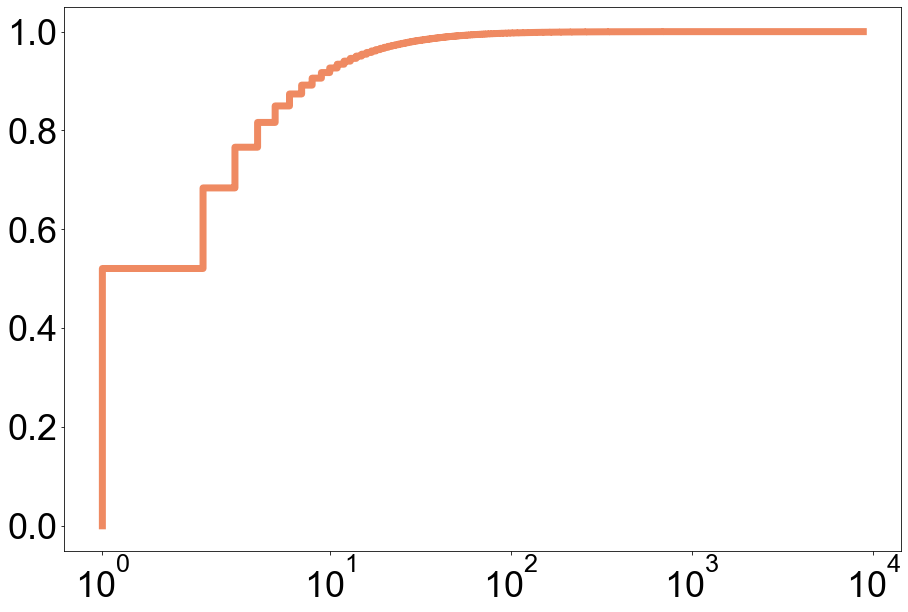

In [67]:
sql = "select c.author, count(distinct p.post_key) from comments c inner join posts p on c.link_key = p.post_key where c.is_valid=1 and c.is_valid_author=1 and p.is_valid_author=1 and c.link_key=c.parent_key group by c.author;"
result_df = cn.select_query_result_to_df(sql)
np_result = np.array(result_df['count(distinct p.post_key)'].tolist())
np_result_list = []
np_result_list.append(np_result)
colors = ['#ef8a62']
legends = ['no legend']
linestyles = ['-']
draw_multiple_cdf_normalize_y(np_result_list, "cdf_participating_posts", colors, '# Comments', legends, linestyles, True)

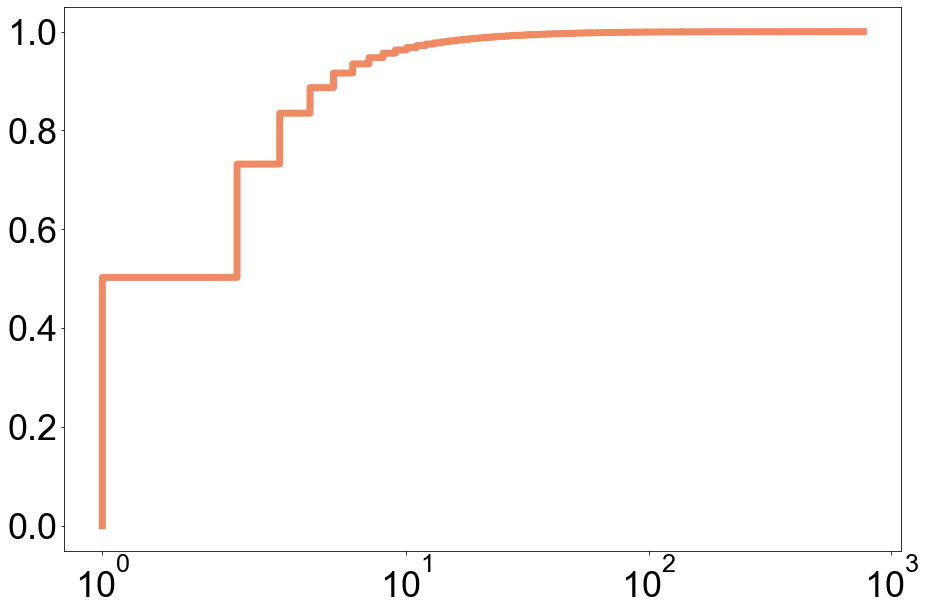

In [68]:
sql = "select p.post_key, count(distinct c.author) from posts p inner join comments c on p.post_key = c.link_key where c.is_valid=1 and c.is_valid_author=1 and p.is_valid_author=1 and c.link_key=c.parent_key group by p.post_key;"
result_df = cn.select_query_result_to_df(sql)
np_result = np.array(result_df['count(distinct c.author)'].tolist())
np_result_list = []
np_result_list.append(np_result)
colors = ['#ef8a62']
legends = ['no legend']
linestyles = ['-']
draw_multiple_cdf_normalize_y(np_result_list, "cdf_supporters", colors, '# Comments', legends, linestyles, True)

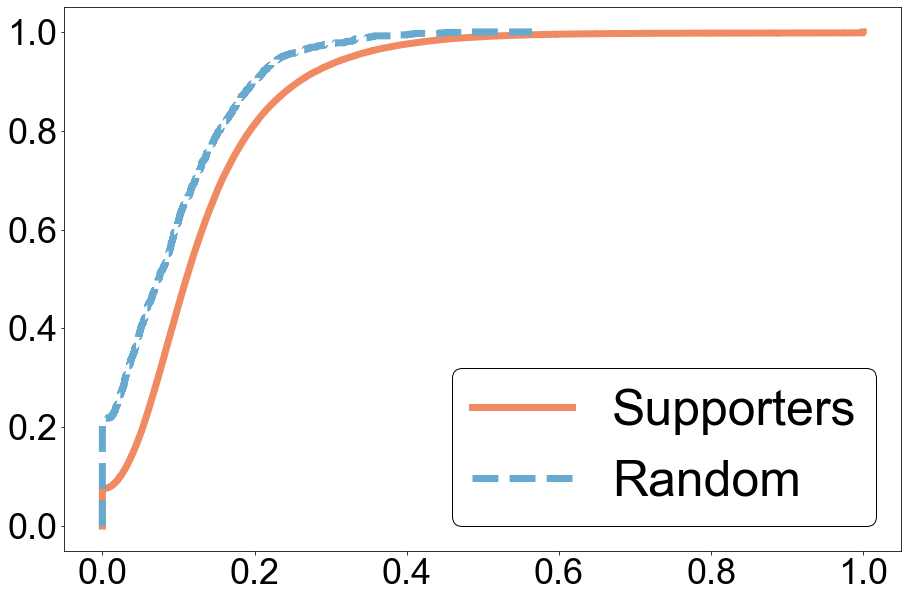

In [94]:
np_result_list2 = []
np_result_list2.append(np.array(result_df2['comments_similarity'].tolist()))
np_result_list2.append(np.array(result_df4['random_comments_similarity'].tolist()))

legends = ['Supporters', 'Random']
colors = ['#ef8a62', '#67a9cf']
linestyles = ['-', '--']

draw_multiple_cdf_normalize_y(np_result_list2, 'cdf_comments_similarity_by_mentor_with_null_model', colors, 'Similarity', legends, linestyles, False)

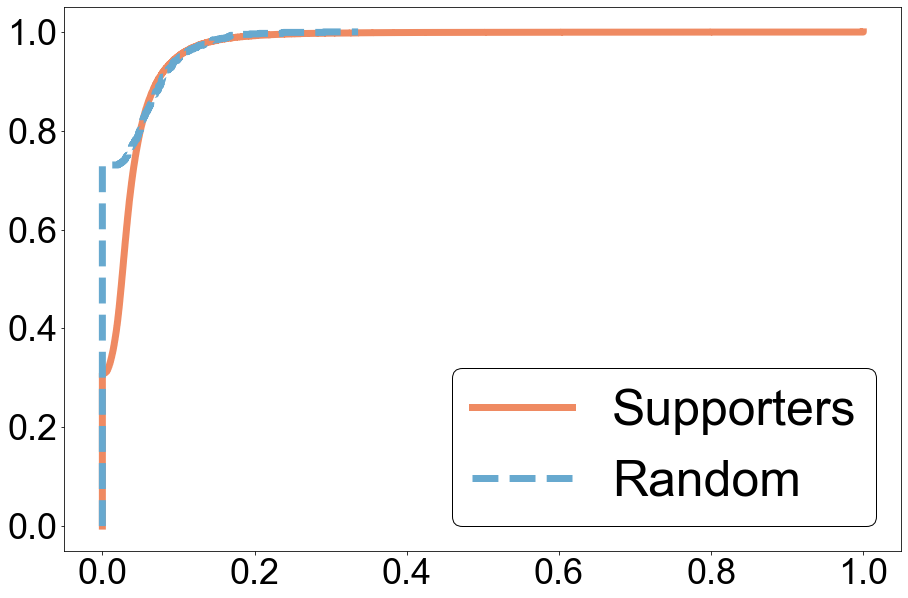

In [95]:
np_result_list3 = []
np_result_list3.append(np.array(result_df3['posts_similarity'].tolist()))
np_result_list3.append(np.array(result_df4['random_posts_similarity'].tolist()))

legends = ['Supporters', 'Random']
colors = ['#ef8a62', '#67a9cf']
linestyles = ['-', '--']

draw_multiple_cdf_normalize_y(np_result_list3, 'cdf_posts_similarity_by_mentor_with_null_model', colors, 'Similarity', legends, linestyles, False)

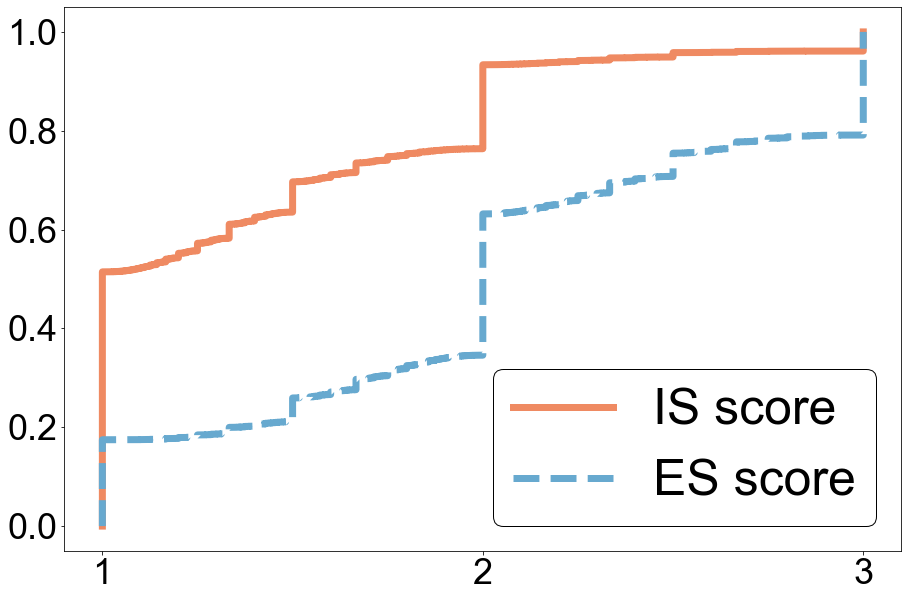

In [96]:
np_result_list4 = []
np_result_list4.append(np.array(result_df['average_is_score'].tolist()))
np_result_list4.append(np.array(result_df['average_es_score'].tolist()))
colors = ['#ef8a62', '#67a9cf']
linestyles = ['-', '--']
legends = ['IS score', 'ES score']
draw_multiple_cdf_normalize_y(np_result_list4, "cdf_average_is_es_scores", colors, 'Average score', legends, linestyles, False, True)

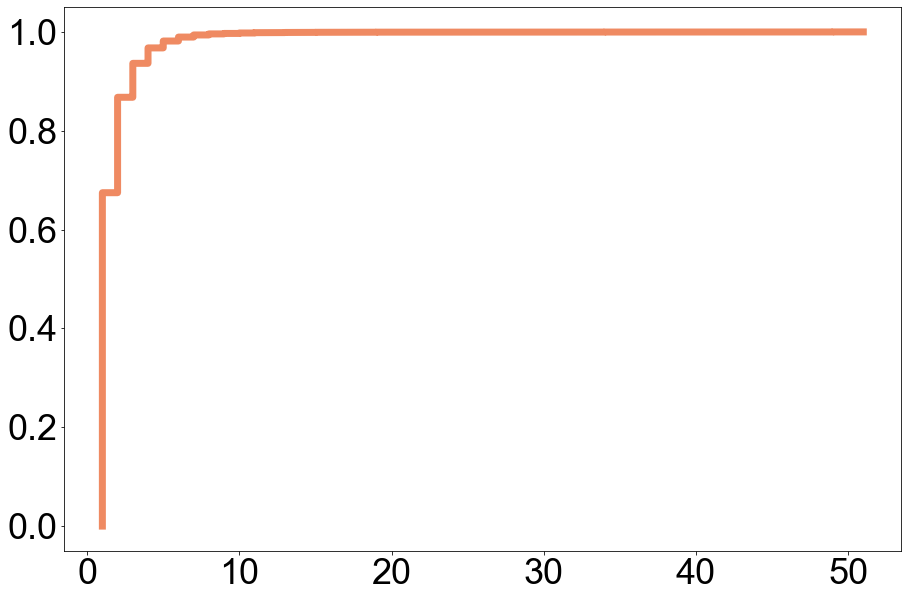

In [100]:
np_result_list5 = []
np_result_list5.append(np.array(subreddit_df['subreddits'].tolist()))
colors = ['#ef8a62']
legends = ['no legend']
linestyles = ['-']
draw_multiple_cdf_normalize_y(np_result_list5, "cdf_num_of_subreddit_by_community", colors, 'subreddit', legends, linestyles, False)

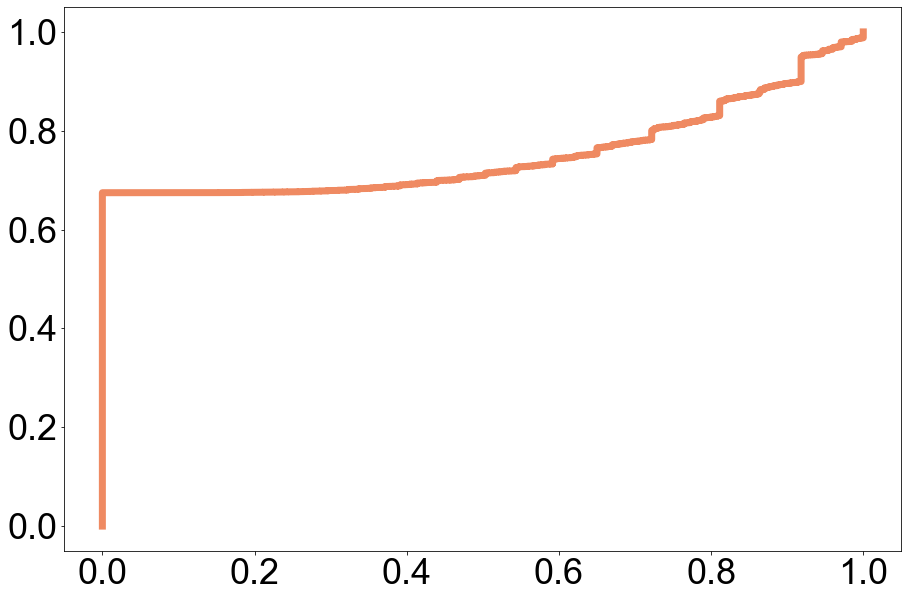

In [103]:
np_result_list6 = []
np_result_list6.append(np.array(subreddit_df['subreddit_entropy'].tolist()))

draw_multiple_cdf_normalize_y(np_result_list6, "cdf_entropy_of_subreddit_by_community", colors, 'entropy', legends, linestyles, False)

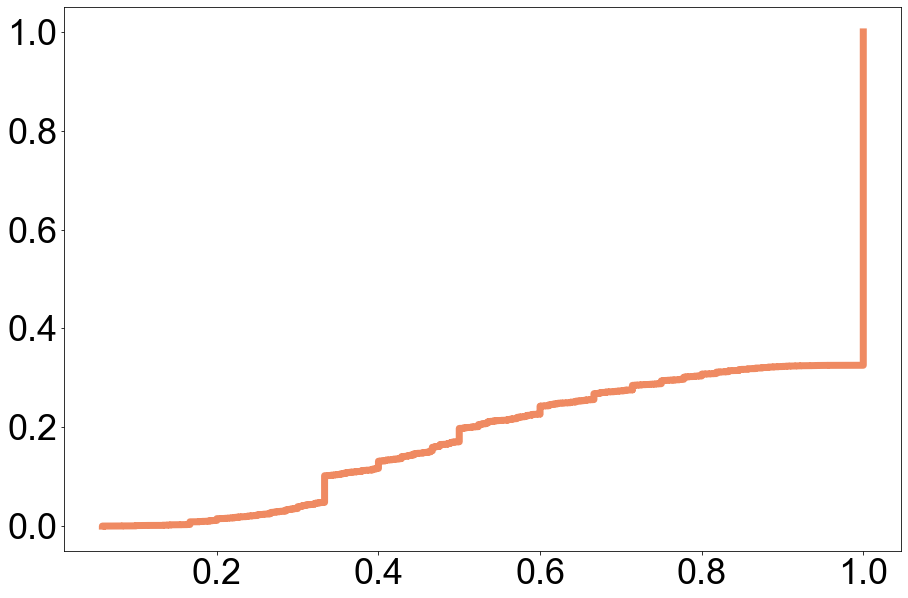

In [106]:
np_result_list7 = []
np_result_list7.append(np.array(subreddit_df['value'].tolist()))

draw_multiple_cdf_normalize_y(np_result_list7, "cdf_idkvaluename_of_subreddit_by_community", colors, 'idk', legends, linestyles, False)

# comment, posts similarity (mentor, null)

In [221]:
result_df4 = pd.read_csv('random_similarity_2.csv')
result_df5 = pd.read_csv('random_similarity_4.csv')

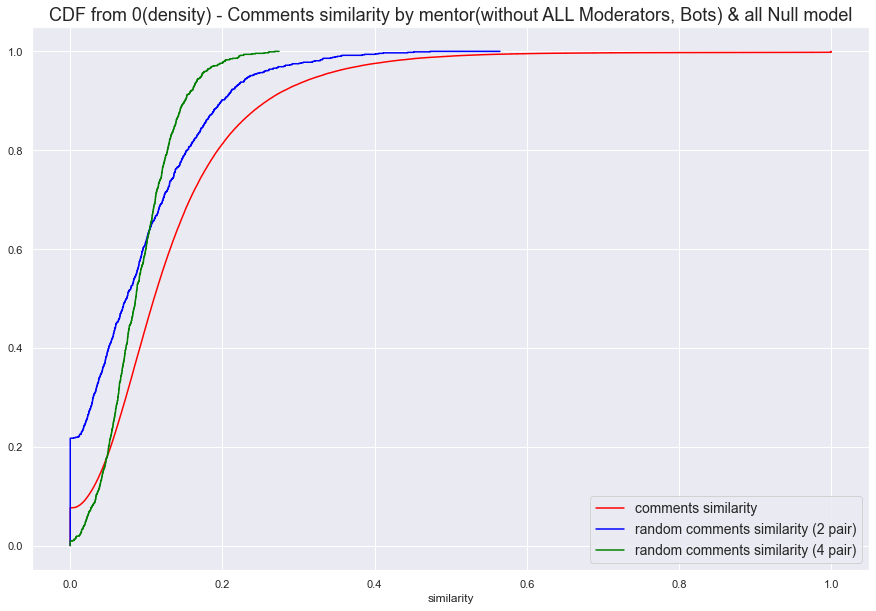

In [224]:
np_result_list2.append(np.array(result_df5['random_comments_similarity'].tolist()))
colors = ['red', 'blue', 'green']
legends = ['comments similarity', 'random comments similarity (2 pair)', 'random comments similarity (4 pair)']
draw_multiple_cdf_normalize_y(np_result_list2, 'CDF from 0(density) - Comments similarity by mentor(without ALL Moderators, Bots) & all Null model', colors, 'similarity', legends, False)

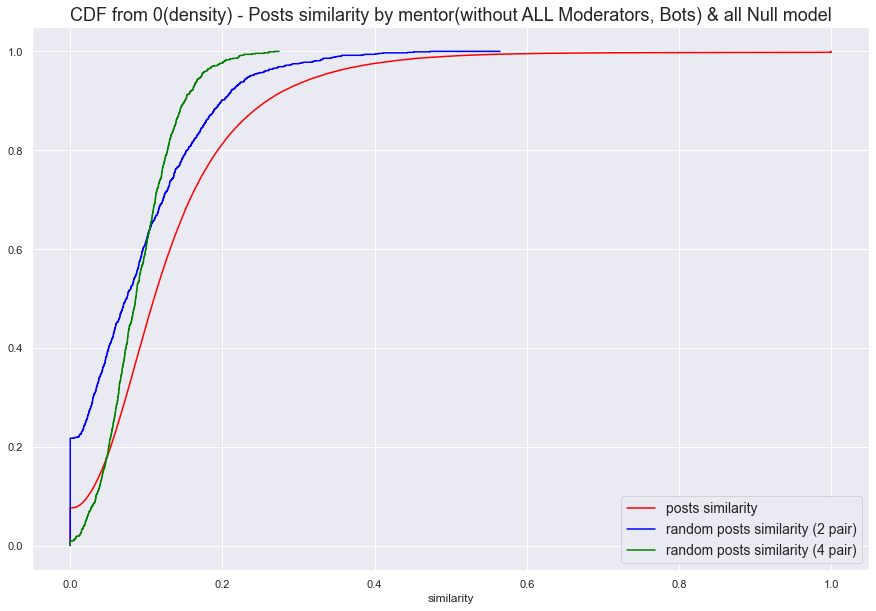

In [226]:
np_result_list3.append(np.array(result_df5['random_comments_similarity'].tolist()))

colors = ['red', 'blue', 'green']
legends = ['posts similarity', 'random posts similarity (2 pair)', 'random posts similarity (4 pair)']
draw_multiple_cdf_normalize_y(np_result_list2, 'CDF from 0(density) - Posts similarity by mentor(without ALL Moderators, Bots) & all Null model', colors, 'similarity', legends, False)

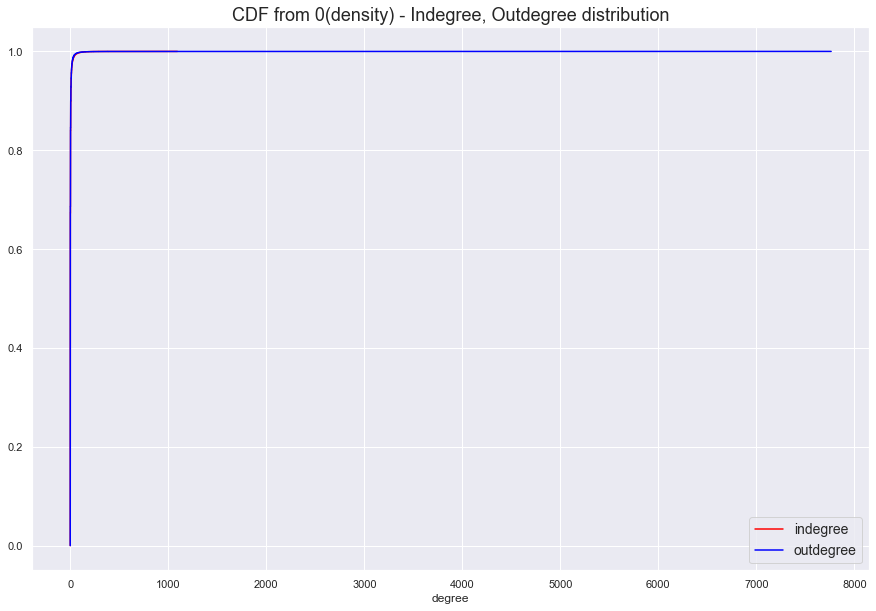

In [228]:
np_result_list5 = []
np_result_list5.append(np.array(result_df6['indegree'].tolist()))
np_result_list5.append(np.array(result_df6['outdegree'].tolist()))

colors = ['red', 'blue']
legends = ['indegree', 'outdegree']
draw_multiple_cdf_normalize_y(np_result_list5, "CDF from 0(density) - Indegree, Outdegree distribution", colors, 'degree', legends, False)

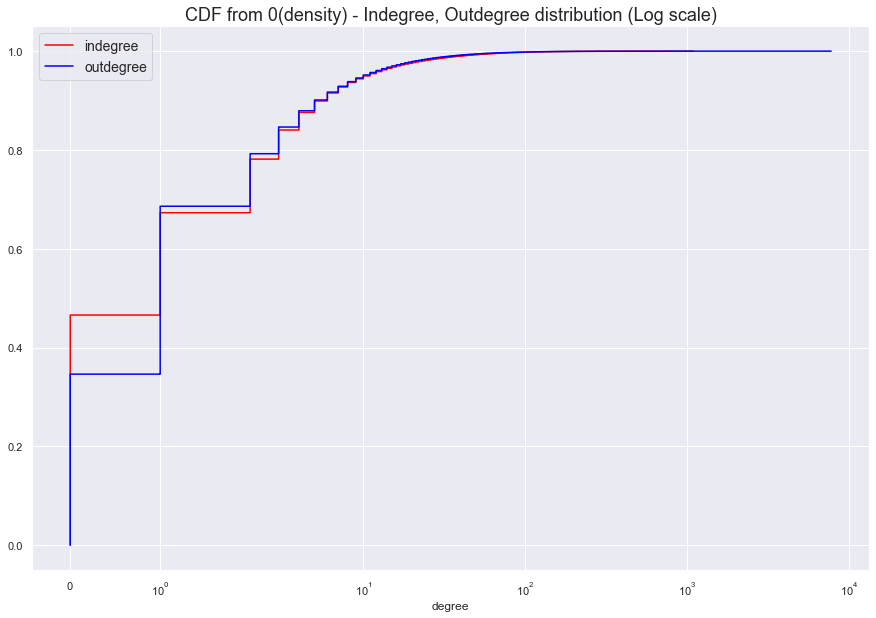

In [229]:
draw_multiple_cdf_normalize_y(np_result_list5, "CDF from 0(density) - Indegree, Outdegree distribution (Log scale)", colors, 'degree', legends, True)

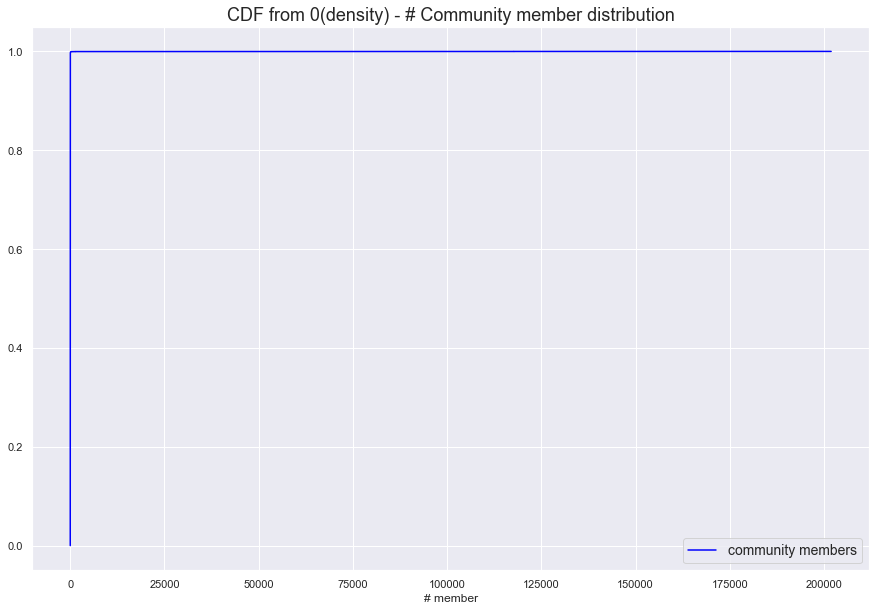

In [230]:
np_result_list6 = []
np_result_list6.append(np.array(result_df7['count(*)'].tolist()))

colors = ['blue']
legends = ['community members']
draw_multiple_cdf_normalize_y(np_result_list6, "CDF from 0(density) - # Community member distribution", colors, '# member', legends, False)

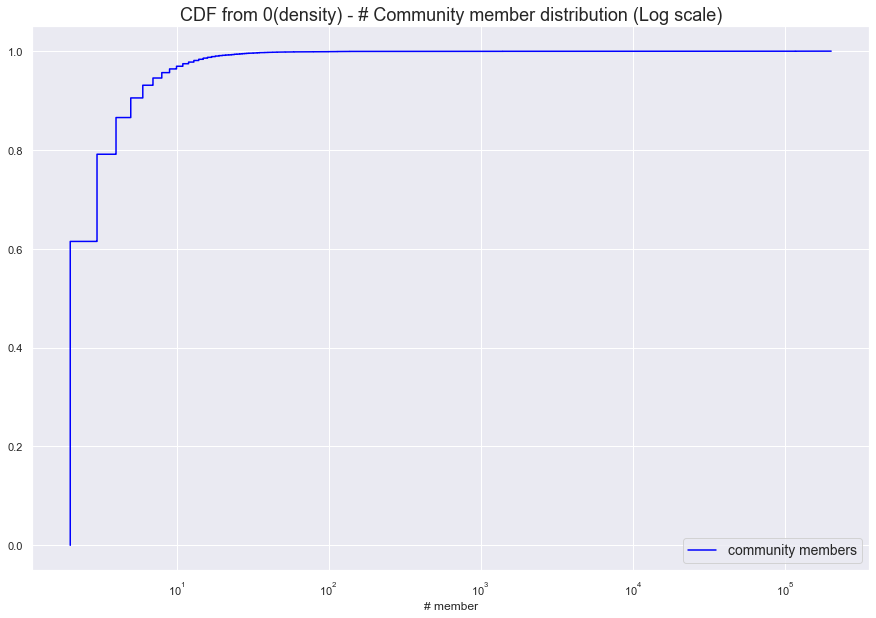

In [232]:
draw_multiple_cdf_normalize_y(np_result_list6, "CDF from 0(density) - # Community member distribution (Log scale)", colors, '# member', legends, True)